# Code written by Bakka Uday Kiran

## Kaggle page link
## I made this page available to all users
## https://www.kaggle.com/fficial/notebook3416d43302

# Importing required libraries

In [21]:
import csv
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense , Flatten,Dropout
from tensorflow.keras import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns

## Mapping image and its class (not needed )

In [2]:
image_class_dic={}
with open("../input/state-farm-distracted-driver-detection/driver_imgs_list.csv") as f:
    reader=csv.reader(f)
    next(reader)
    for row in reader:
        image_class_dic[row[2]]=row[1]

In [3]:
#training directory path
TRAIN_DIR="../input/state-farm-distracted-driver-detection/imgs/train"
#creating dict to convert class to its meaning
class_name = dict()
class_name["c0"] = "SAFE_DRIVING"
class_name["c1"] = "TEXTING_RIGHT"
class_name["c2"] = "TALKING_PHONE_RIGHT"
class_name["c3"] = "TEXTING_LEFT"
class_name["c4"] = "TALKING_PHONE_LEFT"
class_name["c5"] = "OPERATING_RADIO"
class_name["c6"] = "DRINKING"
class_name["c7"] = "REACHING_BEHIND"
class_name["c8"] = "HAIR_AND_MAKEUP"
class_name["c9"] = "TALKING_TO_PASSENGER"

## Creating model and its architecture and giving lossfunction and optimizer

In [4]:

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       131328    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 512)         5

## Creating image data generator
### ***********Here we are splitting our data into training data and validation data(testing data)*********

In [42]:

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2) # set validation split

# training data generator
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(64, 64),
    batch_size=120,
    class_mode='categorical',
    subset='training') # set as training data
# this validation generator can be used for testing and predicting our accuracy..
#************REMEMBER WE ARE USING VALIDATION DATA AS TESTING DATA **************
validation_generator = train_datagen.flow_from_directory(
    TRAIN_DIR, # same directory as training data
    target_size=(64, 64),
    batch_size=120,
    class_mode='categorical',
    subset='validation') # set as validation data


Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [6]:
#if our accuracty is not improving in further steps we are going to stop it early
cs=EarlyStopping(monitor="val_acc",patience=2,min_delta=0.01)

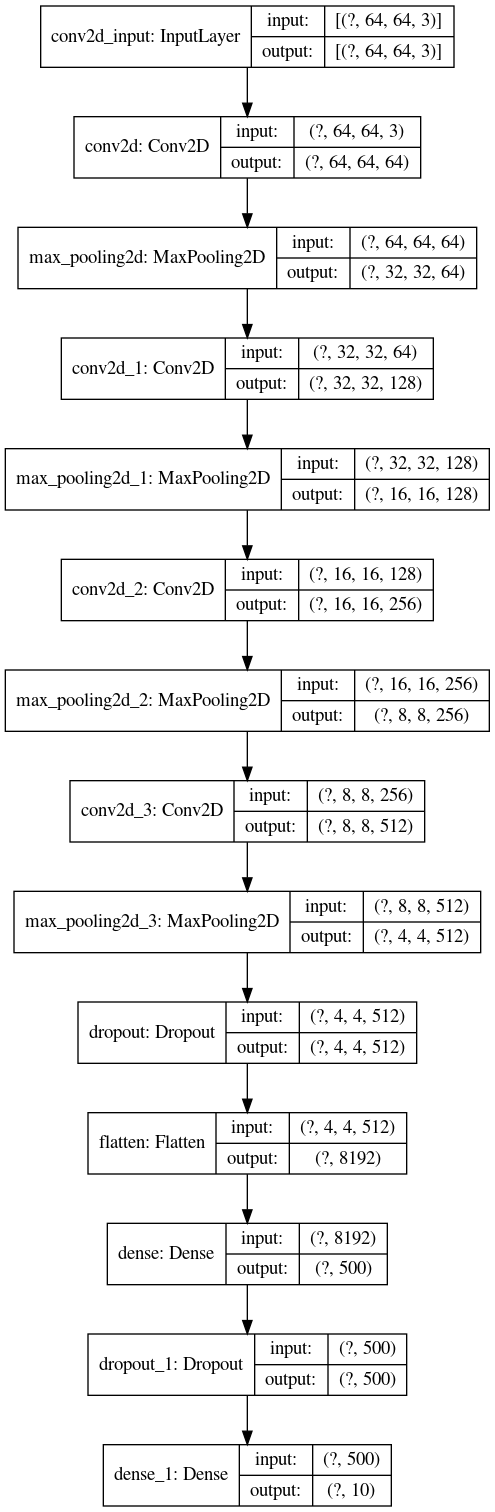

In [12]:
plot_model(model,show_shapes=True,show_layer_names=True)

## Fitting our model using fit_generator 
## Our model history is stored in model_history
## So that we can see how our model accuracy and loss changed over the concurrent epochs

In [8]:
model_history=model.fit_generator(train_generator,epochs=10,verbose=1,validation_data=validation_data,callbacks=[cs])

Epoch 1/10
176/176 [==============================] - 401s 2s/step - loss: 1.5326 - accuracy: 0.4601 - val_loss: 0.4332 - val_accuracy: 0.8595
Epoch 2/10
176/176 [==============================] - 380s 2s/step - loss: 0.4017 - accuracy: 0.8721 - val_loss: 0.0760 - val_accuracy: 0.9808
Epoch 3/10
176/176 [==============================] - 384s 2s/step - loss: 0.2059 - accuracy: 0.9402 - val_loss: 0.0622 - val_accuracy: 0.9810
Epoch 4/10
176/176 [==============================] - 381s 2s/step - loss: 0.1448 - accuracy: 0.9592 - val_loss: 0.0360 - val_accuracy: 0.9899
Epoch 5/10
176/176 [==============================] - 374s 2s/step - loss: 0.1245 - accuracy: 0.9666 - val_loss: 0.0777 - val_accuracy: 0.9761
Epoch 6/10
176/176 [==============================] - 379s 2s/step - loss: 0.1127 - accuracy: 0.9701 - val_loss: 0.0190 - val_accuracy: 0.9947
Epoch 7/10
176/176 [==============================] - 378s 2s/step - loss: 0.1091 - accuracy: 0.9719 - val_loss: 0.0225 - val_accuracy: 0.9936

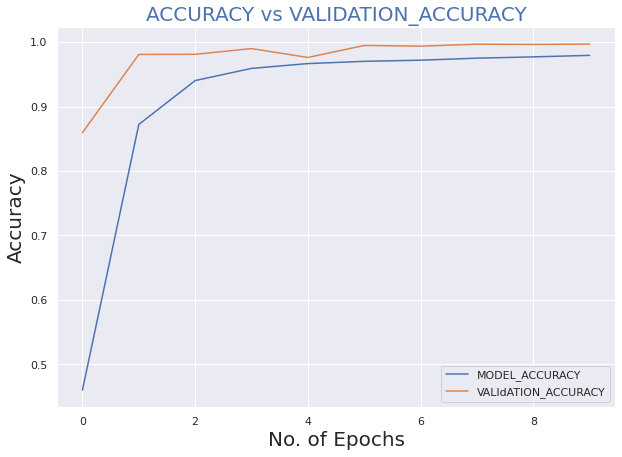

In [40]:
sns.set()
plt.figure(figsize=(10,7))
plt.plot(model_history.history["accuracy"],label="MODEL_ACCURACY")
plt.plot(model_history.history["val_accuracy"],label="VALIdATION_ACCURACY")
plt.xlabel("No. of Epochs",size=20)
plt.ylabel("Accuracy",size=20)
plt.title("ACCURACY vs VALIDATION_ACCURACY",size=20,color='b')
plt.legend()
plt.show()

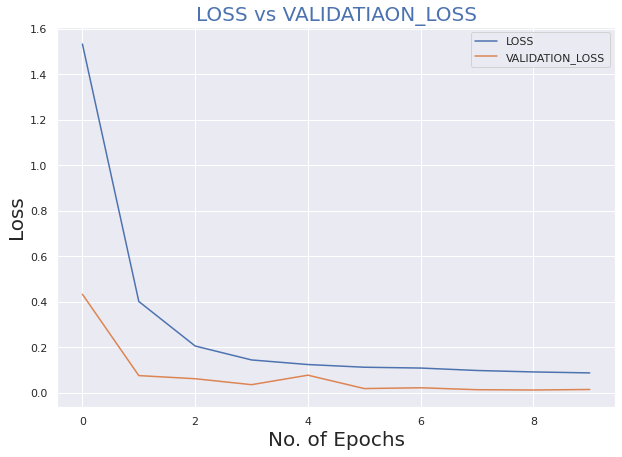

In [39]:
sns.set()
plt.figure(figsize=(10,7))
plt.plot(model_history.history["loss"],label="LOSS")
plt.plot(model_history.history["val_loss"],label="VALIDATION_LOSS")
plt.xlabel("No. of Epochs",size=20)
plt.ylabel("Loss",size=20)
plt.title("LOSS vs VALIDATIAON_LOSS",size=20,color='b')
plt.legend()
plt.show()

### THERE IS NO NEED FOR US TO DO SEPARATE TRAINING AND TESTING SINCE WE SPLITTED OUR DATA INTO TRAINING AND VALIDATION DATA ...SO WE USED VALIDATION DATA AS ***TESTING DATA***  AS COMPLETELY DIFFERENT FROM TRAINING DATA
## So we can see that after 10 epochs our validation(testing data) accuracy is 0.9969 
# So our model accuracy is 0.9969